In [ ]:
#imprting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
#importing the dataset
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


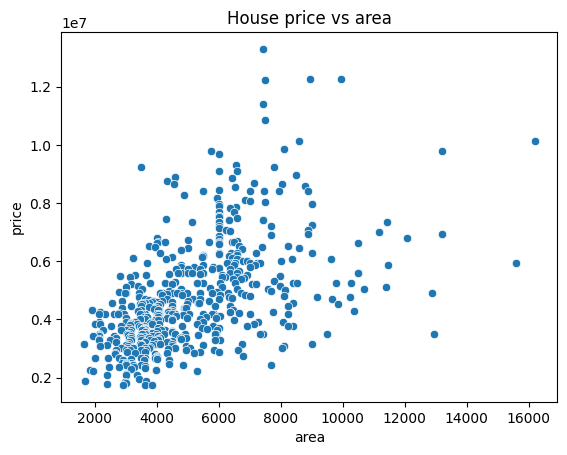

In [ ]:
#visualizing the data
sns.scatterplot(data=df,x="area",y="price")
plt.title("House price vs area")
plt.show()

In [ ]:
#prepocessing data
df.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#extacting the data
x=np.array(df["area"])
y=np.array(df["price"])

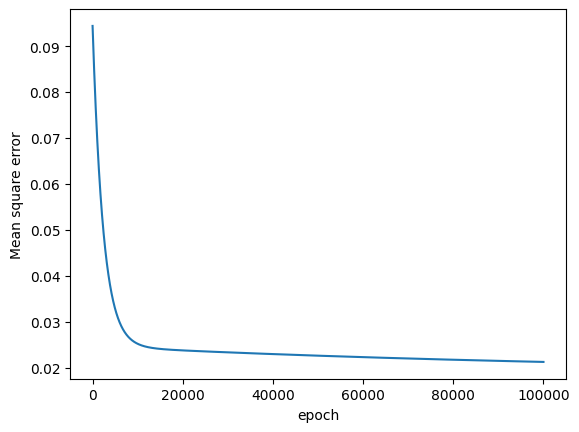

In [ ]:
#normalization
def MinMaxScaling(x,y):
  y=(y-np.min(y))/(np.max(y)-np.min(y))
  x=(x-np.min(x))/(np.max(x)-np.min(x))
  return x,y

#model
def My_LinearRegression(x,y,epoch,learning_rate):
  #initialising
  weight=0
  bias=0
  n=x.size
  loss=[]
  #training with Gradient descent
  for i in range(epoch):
    y_pred=(weight*x) + bias
    diff=y-y_pred
    mse=np.mean(diff**2)    #Calculating the Mean Square Error
    loss.append(mse)
    dw=(-2/n)*np.sum(diff*x)
    db=(-2/n)*np.sum(diff)
    weight-=learning_rate*dw    #Updating the Weight and Bias with Gradient
    bias-=learning_rate*db
    if mse < 1e-6:
      print(f"Early stopping at epoch {i} with MSE {mse}")
      break
  #plotting
  plt.plot(loss)
  plt.xlabel("epoch")
  plt.ylabel("Mean square error")
  plt.show()

  return weight,bias,y_pred

#normalize
x,y=MinMaxScaling(x,y)
weight,bias,y_pred=My_LinearRegression(x,y,100000,0.0001)

In [1]:
#For Comparing My Linear Regression Model with that of Sklearn Library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Reshape x and y to be 2D and Fitting the Data in Sklearn Model
def sklearn_LR(x,y):
  x_2d = x.reshape(-1, 1)
  y_2d = y.reshape(-1, 1)
  model_sklearn = LinearRegression()
  model_sklearn.fit(x_2d, y_2d)
  y_pred_sklearn = model_sklearn.predict(x_2d)
  y_flat=y_pred_sklearn.flatten()

  return y_flat,x_2d,model_sklearn
y_flat,x_2d,model_sklearn=sklearn_LR(x,y)

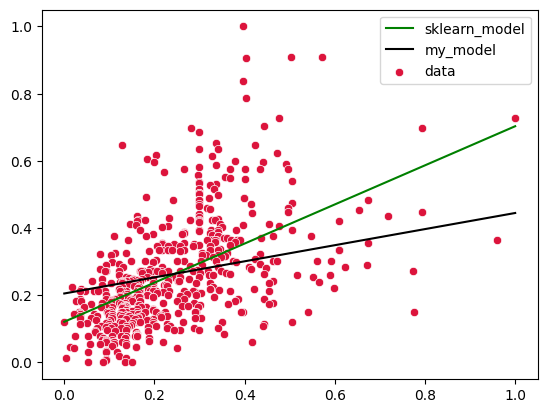

In [ ]:
#Comparison of Both Models with Graph
def plot_cmp(x,y,y_flat,y_pred):
  sns.lineplot(x=x,y=y_flat,color="green",label="sklearn_model")
  sns.lineplot(x=x,y=y_pred,color="black",label="my_model")
  sns.scatterplot(x=x,y=y,color="crimson",label="data")
  plt.legend()
  plt.show()
plot_cmp(x,y,y_flat,y_pred)

In [ ]:
#Comparison of Both Models through MSE
from sklearn.metrics import mean_squared_error
def Model_accuracy(y,y_pred,x_2d,model_sklearn):
  mse_sklearn = mean_squared_error(y, model_sklearn.predict(x_2d))
  mse_custom = mean_squared_error(y, y_pred)

  print(f"Sklearn MSE: {mse_sklearn:.4f}")
  print(f"Custom Model MSE: {mse_custom:.4f}")

Model_accuracy(y,y_pred,x_2d,model_sklearn)

Sklearn MSE: 0.0187
Custom Model MSE: 0.0213


In [ ]:
#Importing diff Dataset for Model comparison
df1=pd.read_csv("advertising.csv")
df1

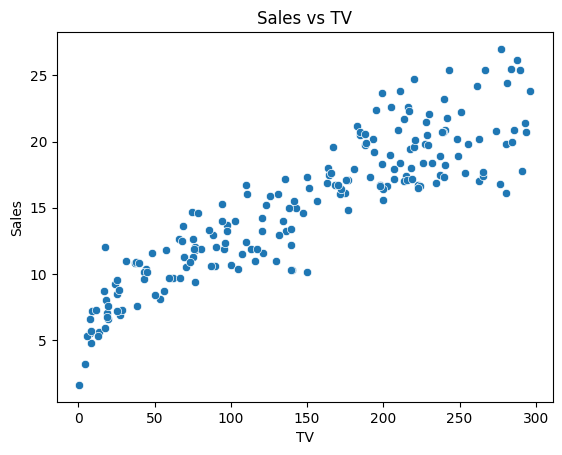

In [ ]:
#Plotting the data
sns.scatterplot(data=df1,x="TV",y="Sales")
plt.title("Sales vs TV")
plt.show()

In [ ]:
#Same Preprocessing and data Extraction
df1.dropna()
X=np.array(df1["TV"])
Y=np.array(df1["Sales"])

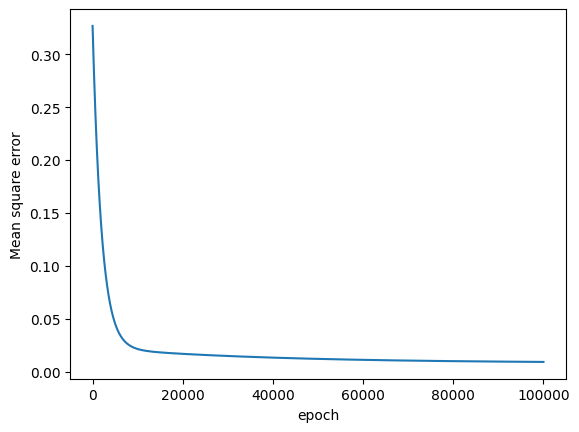

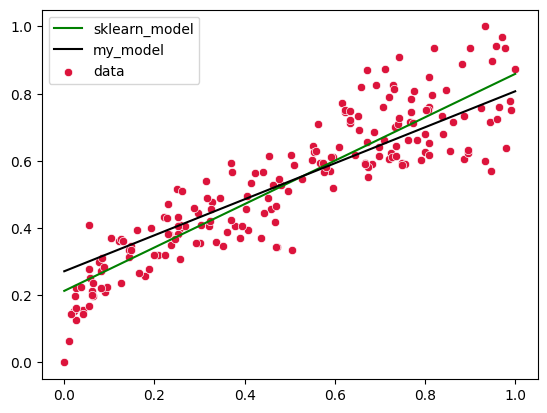

In [ ]:
#Normalisation and Model Training
X,Y=MinMaxScaling(X,Y)
Weights,Bias,Y_pred=My_LinearRegression(X,Y,100000,0.0001)
Y_flat,X_2d,Model_sklearn=sklearn_LR(X,Y)
plot_cmp(X,Y,Y_flat,Y_pred)

In [ ]:
Model_accuracy(Y,Y_pred,X_2d,Model_sklearn)

Sklearn MSE: 0.0081
Custom Model MSE: 0.0091
